In [12]:
import numpy as np 
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [2]:
# Carregando os dados 
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")

### Vamos dar uma olhada nos dados

In [3]:
data_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [5]:
# separa a coluna de labels
labels = data_train["label"]

# retira a coluna do dados de treinamento
data = data_train.drop('label', axis = 1, inplace=True)

### Normalizar os dados usando minmax
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

X_scaled = X_std * (max - min) + min

In [6]:
#  a biblioteca sklearn possui essa função
scaler = MinMaxScaler()
data_train = pd.DataFrame(scaler.fit_transform(data_train),
                          columns=data_train.columns, 
                          index=data_train.index)

In [7]:
# vrificando a normalização
data_train.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000863,0.000461,0.000233,0.000080,0.000068,0.000046,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.024854,0.018243,0.012943,0.006956,0.007459,0.006682,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0


### Função auxiliar para salvar os resultados em arquivo csv no formato requerido pelo Kaggle

In [8]:
def save_predict(data, filename="result.csv"):
    """Recebe dataframe e salva em arquivo CSV no formato pedido pelo site Kaggle

    Parameters:
    data (pandas DataFrame): dataframe conendo os resultados das predicoes

   """
    result_dict = {
        "ImageId": [i for i in range(1, len(data)+1)],
        "label": data.astype(int)
    }
    result_df = pd.DataFrame(result_dict)
    result_df.to_csv(filename, index=False)

### Testar um primeiro modelo

In [9]:
### MLPClassifier

mlp_model = MLPClassifier(solver='adam', # ‘lbfgs’, ‘sgd’, ‘adam’
                          alpha=1e-5,    # regularização L2 ridge
                          hidden_layer_sizes=(512, 64),  #default (100,) 
                          random_state=1, 
                          max_iter=150)

mlp_model.fit(data_train, labels)                         
pred_mlp =  mlp_model.predict(data_test) # obteve score de 0.97567
save_predict(pred_mlp)

###  Validação cruzada 

In [10]:
# separa os dados aleatoriamente, 70% para treino e 30% para teste (test_size=0.3)
X_train, X_test, y_train, y_test = train_test_split(data_train, labels, test_size=0.3)

In [11]:
### Roda o classificador utilizando o novo conjunto de dados 

mlp_model.fit(X_train, y_train)                         
pred_mlp =  mlp_model.predict(X_test) 
mlp_model.score(X_test, y_test)

0.9784920634920635

### Usando K fold

In [16]:
scores = cross_val_score(mlp_model, data_train, labels, cv=5, scoring='accuracy')

In [23]:
scores.mean()

0.9765706650074591

### Matriz de confusão

In [14]:
matriz_conf = confusion_matrix(y_test, pred_mlp)
print(matriz_conf)

[[1211    0    2    2    0    4    7    0    1    1]
 [   0 1412    2    4    0    0    0    4    1    1]
 [   3    6 1263    1    3    1    1   10    6    0]
 [   0    3    6 1252    0   11    0    5    6    3]
 [   0    3    5    0 1239    1    5    0    0   10]
 [   3    4    0   11    0 1071    5    2    8    3]
 [   3    2    1    0    2    2 1259    0    3    0]
 [   1    3    2    1    2    0    0 1271    4   10]
 [   3    3    2    8    2    4    4    1 1157    8]
 [   3    2    1    6   11    3    1   10    9 1194]]


IndexError: boolean index did not match indexed array along dimension 0; dimension is 10 but corresponding boolean dimension is 100

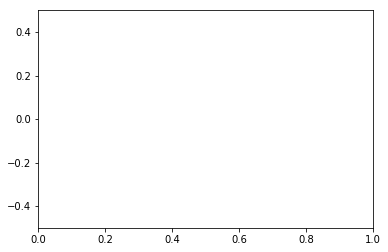

In [21]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.swarmplot(matriz_conf, annot=False)
plt.show()